# Import Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load Dataset

In [6]:
df = pd.read_csv('Shopping Mall Customer Segmentation Data .csv')
df.head()

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76


# Checking missing values

In [9]:
print("Missing values before cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
Customer ID       0
Age               0
Gender            0
Annual Income     0
Spending Score    0
dtype: int64


# Handling Outliers

In [17]:
Q1 = df[['Annual Income', 'Spending Score']].quantile(0.25)
Q3 = df[['Annual Income', 'Spending Score']].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = ((df[['Annual Income', 'Spending Score']] < (Q1 - 1.5 * IQR)) | (df[['Annual Income', 'Spending Score']] > (Q3 + 1.5 * IQR))).any(axis=1)

outliers = df[outlier_condition]
df_cleaned = df[~outlier_condition]

print("Outliers identified and removed:")
display(outliers)

print("\nShape of data before outlier handling:", df.shape)
print("Shape of data after outlier handling:", df_cleaned.shape)


Outliers identified and removed:


,Customer ID,Age,Gender,Annual Income,Spending Score



Shape of data before outlier handling: (15079, 5)
Shape of data after outlier handling: (15079, 5)


# Visualize the scaled data

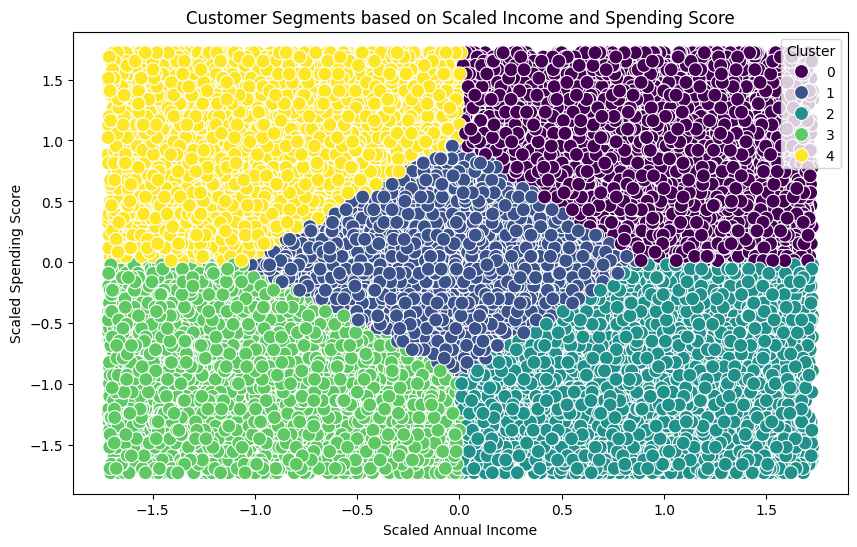

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df_cleaned['Cluster'], palette='viridis', s=100)
plt.title('Customer Segments based on Scaled Income and Spending Score')
plt.xlabel('Scaled Annual Income')
plt.ylabel('Scaled Spending Score')
plt.legend(title='Cluster')
plt.show()


# Applying K-Means clustering

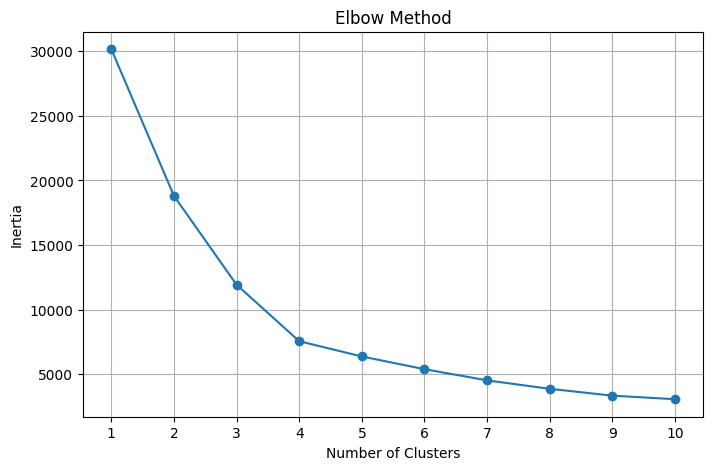

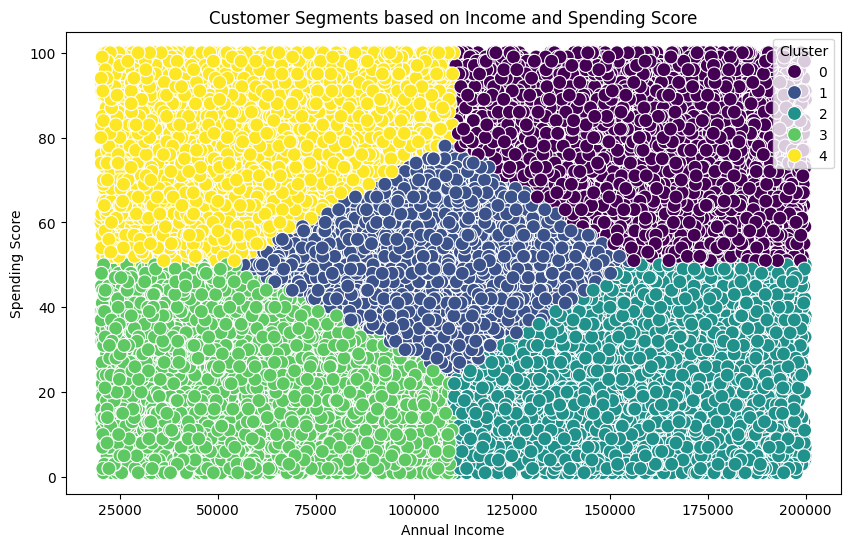

,Customer ID,Age,Gender,Annual Income,Spending Score,Cluster
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89,0
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95,0
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76,4
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57,4
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76,0


In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df_cleaned[['Annual Income', 'Spending Score']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
df_cleaned['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income', y='Spending Score', hue='Cluster', data=df_cleaned, palette='viridis', s=100)
plt.title('Customer Segments based on Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()

display(df_cleaned.head())

# Applying DBSCAN for clustering

In [30]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
df_cleaned['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

print("\nAverage Spending Score per K-Means Cluster:")
display(df_cleaned.groupby('Cluster')['Spending Score'].mean().reset_index())

print("\nAverage Spending Score per DBSCAN Cluster:")
display(df_cleaned.groupby('DBSCAN_Cluster')['Spending Score'].mean().reset_index())




Average Spending Score per K-Means Cluster:


,Cluster,Spending Score
0,0,77.792634
1,1,51.448408
2,2,23.236307
3,3,22.563415
4,4,78.898025



Average Spending Score per DBSCAN Cluster:


,DBSCAN_Cluster,Spending Score
0,0,50.591617
